# Ridge Regression

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


In [25]:
data=pd.read_csv('/Users/deonschellito619/Desktop/Regression/Data/ex1-Copy1.csv',header= None, names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [26]:
data.shape

(97, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


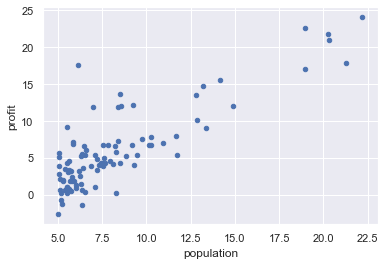

In [27]:
data.plot('population','profit',kind='scatter')

In [28]:
train=data.iloc[[21,30],:]
test=data
test.drop([21,30],axis=0,inplace=True)

In [29]:
x_train,y_train,x_test,y_test=train.population.values.reshape(-1,1),train.profit, \
test.population.values.reshape(-1,1),test.profit

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

1.0

1.0


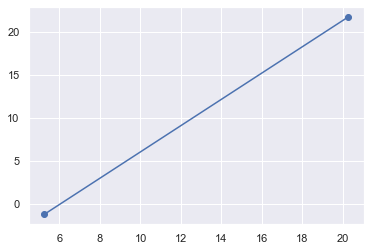

In [31]:
#train
print(reg.score(x_train,y_train))
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train))

0.35160616061837735


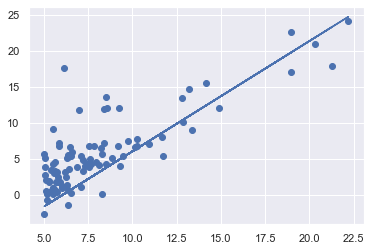

In [32]:
print(r2_score(y_test,reg.predict(x_test)))
plt.scatter(x_test,y_test)
plt.plot(x_test,reg.predict(x_test))

# Ridge Regression Problem 1

In [40]:
x_train,y_train,x_test,y_test=train.population.values.reshape(-1,1),train.profit, \
test.population.values.reshape(-1,1),test.profit

In [47]:
from sklearn.linear_model import Ridge
n_alphas = 200
alphas   = np.logspace(-5, 3, n_alphas)
alphas
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True) # Since we did not add a col of 1s
    ridge.fit(x_train,y_train)
    coefs.append(ridge.coef_)

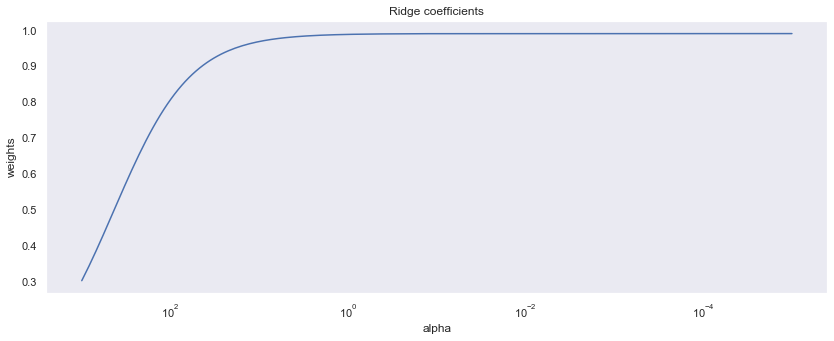

In [42]:
plt.figure(figsize=(14, 5))
plt.grid()

ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel('alpha')
plt.ylabel('weights')

plt.title('Ridge coefficients');

In [43]:
reg_1=Ridge(alpha=55)
reg_1.fit(x_train,y_train)

Ridge(alpha=55, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [44]:
reg_1.score(x_train,y_train)

0.8925201548241419

0.8925201548241419


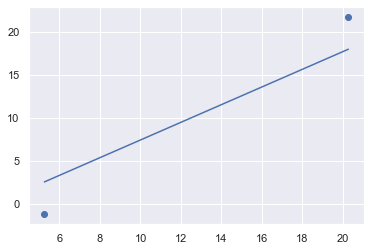

In [45]:
print(r2_score(y_train,reg_1.predict(x_train)))
plt.scatter(x_train,y_train)
plt.plot(x_train,reg_1.predict(x_train))

0.659984321369337


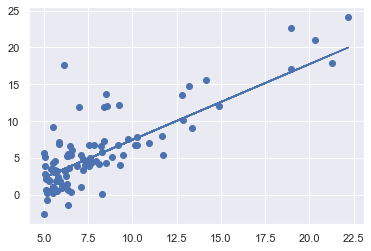

In [46]:
print(r2_score(y_test,reg_1.predict(x_test)))
plt.scatter(x_test,y_test)
plt.plot(x_test,reg_1.predict(x_test))

# Polynomial Regression

In [11]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(dddata=boston_dataset.data, 
                      columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

In [12]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


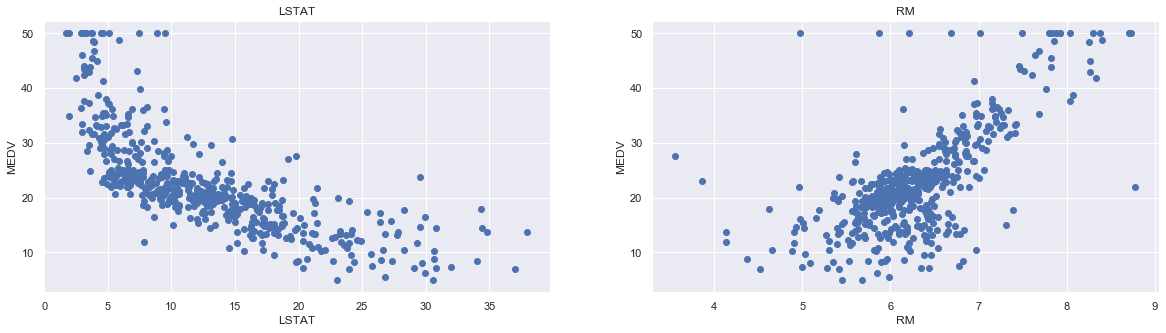

In [13]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [14]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [16]:
def poly_function(degrees):
    
    degree_list      = []
    train_rmse_list  = []
    train_r2_list    = []
    test_rmse_list   = []
    test_r2_list     = []
    
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)

        # transforms the existing features to higher degree features.
        X_train_poly = poly_features.fit_transform(X_train)

        # fit the transformed features to Linear Regression
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train)

        # predicting on training data-set
        y_train_pred = poly_model.predict(X_train_poly)

        # predicting on test data-set
        y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))

        # evaluating the model on training dataset
        rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred))
        r2_train   = metrics.r2_score(Y_train, y_train_pred)

        # evaluating the model on test dataset
        rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred))
        r2_test   = metrics.r2_score(Y_test, y_test_pred)
    
        degree_list.append(degree)
        train_rmse_list.append(rmse_train)
        train_r2_list.append(r2_train)
        test_rmse_list.append(rmse_test)
        test_r2_list.append(r2_test)
        
    return degree_list, train_rmse_list, train_r2_list, test_rmse_list, test_r2_list
    

In [17]:
degree_list = np.arange(1, 20, 1)

degree_list, train_rmse_list, train_r2_list, test_rmse_list, test_r2_list = poly_function(degree_list)

results= pd.DataFrame({'degrees':   np.array(degree_list), 
                       'train_mse': np.array(train_rmse_list),
                       'train_r2':  np.array(train_r2_list), 
                       'test_mse':  np.array(test_rmse_list),
                       'test_r2':   np.array(test_r2_list)
                      })

In [18]:
results

,degrees,train_mse,train_r2,test_mse,test_r2
0,1,5.637129,0.630075,5.137401,6.628997e-01
1,2,4.703071,0.742509,3.784820,8.170372e-01
2,3,4.532072,0.760893,3.869197,8.087885e-01
3,4,4.276081,0.787142,3.888595,8.068665e-01
4,5,4.121480,0.802255,3.856149,8.100760e-01
5,6,8.690614,0.120777,14.879080,-1.827642e+00
6,7,3.975774,0.815990,4.639559,7.250678e-01
7,8,3.983794,0.815247,24.146734,-6.447132e+00
8,9,3.934958,0.819749,11.424102,-6.669263e-01
9,10,3.863591,0.826228,31.506309,-1.167848e+01
